# Análisis de sentimientos

Video 2: https://www.youtube.com/watch?v=A5Ap5PR2VLM&t=711s


In [13]:
import requests #Para llamar la API
from textblob import TextBlob  #Librería para hacer análisis de sentimiento
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Parámetros de conexión con la API
url = 'https://newsapi.org/v2/everything'
api_key = 'eb0a800a76604bf6a5466ac3fbf6537b'

In [3]:
# Parámetros de busqueda
query = 'Apple'
language = 'es'

In [4]:
# Congifuración de los parámetros de la solicitud

params = {
    'q': query,
    'language': language,
    'apikey': api_key
}

In [5]:
# Realizamos la solicitud de obtención de datos a News API

response = requests.get(url,params = params)
data = response.json()

In [6]:
data # Los lee como un diccionario

{'status': 'ok',
 'totalResults': 3931,
 'articles': [{'source': {'id': None, 'name': 'Hipertextual'},
   'author': 'Gabriel Erard',
   'title': 'El Apple Vision Pro podría añadir soporte para el Apple Pencil',
   'description': 'Apple estaría trabajando para dotar al Vision Pro, su ordenador espacial, con soporte para el Apple Pencil. Según reporta MacRumors, los de Cupertino han estado experimentando con una nueva versión del stylus que sería compatible con visionOS y permitiría su …',
   'url': 'http://hipertextual.com/2024/03/apple-vision-pro-soporte-apple-pencil',
   'urlToImage': 'https://imgs.hipertextual.com/wp-content/uploads/2023/06/DSC06396-scaled.jpg',
   'publishedAt': '2024-03-25T15:35:27Z',
   'content': 'Apple estaría trabajando para dotar al Vision Pro, su ordenador espacial, con soporte para el Apple Pencil. Según reporta MacRumors, los de Cupertino han estado experimentando con una nueva versión d… [+3229 chars]'},
  {'source': {'id': None, 'name': 'Hipertextual'},
 

In [7]:
# Cuántos artículos hay
#get es método de diccionarios para acceder a los indices. si no está presente devuelve []

len(data.get('articles', []))

100

In [10]:
# Veamos información sobre los autores de los articulos

conteo_autores = {}

# Recorremos cada artículo en la lista de artículos
for articulo in data['articles']:
    # Obtenemos el autor del artículo actual
    autor = articulo.get('author', 'Desconocido')  # Si no hay autor, lo marcamos como 'Desconocido'
    
    # Incrementamos el conteo de artículos para este autor
    if autor in conteo_autores:
        conteo_autores[autor] += 1
    else:
        conteo_autores[autor] = 1

# Mostramos el resultado
for autor, cantidad in conteo_autores.items():
    print(f"Autor: {autor}, Artículos: {cantidad}")

Autor: Gabriel Erard, Artículos: 8
Autor: Rubén Chicharro, Artículos: 8
Autor: Luis Miranda, Artículos: 8
Autor: Quelian Sanz, Artículos: 20
Autor: Javier Marquez, Artículos: 12
Autor: Ricardo Aguilar, Artículos: 15
Autor: Luis del Barco, Artículos: 1
Autor: Eduardo Arcos, Artículos: 2
Autor: Aglaia Berlutti, Artículos: 1
Autor: Javier Lacort, Artículos: 5
Autor: José María López, Artículos: 2
Autor: Matías S. Zavia, Artículos: 1
Autor: Javier Pastor, Artículos: 4
Autor: Rubén Andrés, Artículos: 1
Autor: Gonzalo Franco, Artículos: 1
Autor: Manu García (Visnuh), Artículos: 2
Autor: Herrera Castro, Artículos: 1
Autor: Enrique Pérez, Artículos: 1
Autor: Alberto de la Torre, Artículos: 1
Autor: Alberto García, Artículos: 1
Autor: Juan Carlos López, Artículos: 1
Autor: Christian Ruiz, Artículos: 1
Autor: Iván Ramírez, Artículos: 1
Autor: Jesús Quesada, Artículos: 1
Autor: José Alberto Lizana, Artículos: 1


C:\Users\Julian\AppData\Local\Temp\ipykernel_11832\3285498815.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = conteo_autores.keys(),y=conteo_autores.values(),palette="pastel")


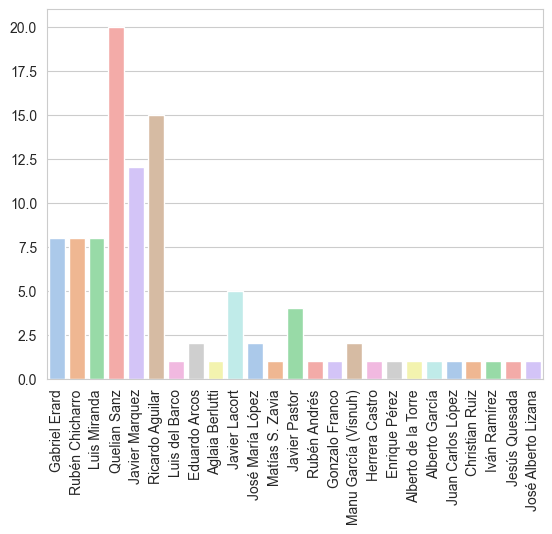

In [19]:
sns.set_style("whitegrid")
sns.barplot(x = conteo_autores.keys(),y=conteo_autores.values(),palette="pastel")
plt.xticks(rotation=90)
plt.show()


In [20]:
# Analizamos el sentimiento de cada noticia

for article in data['articles']:
    title = article['title']
    description = article['description']
    #Concatenar el titulo y la descripción para el análisis de sentimiento
    text = f'{title}{description}'

    #Crear una instancia de TextBlob
    blob = TextBlob(text)
    #Obtener la polaridad del sentimiento
    polarity = blob.sentiment.polarity
    # Obtener la subjetividad del sentimiento
    subjectivity = blob.sentiment.subjectivity
    #Imprimir los resultadas

    print('Noticias:')
    print(f'Titulo: {title}')
    print(f'Descripción: {description}')
    print('Sentimiento:')
    print('Polaridad', polarity)
    print('Subjetividad:',subjectivity)
    print('=================================')

Noticias:
Titulo: El Apple Vision Pro podría añadir soporte para el Apple Pencil
Descripción: Apple estaría trabajando para dotar al Vision Pro, su ordenador espacial, con soporte para el Apple Pencil. Según reporta MacRumors, los de Cupertino han estado experimentando con una nueva versión del stylus que sería compatible con visionOS y permitiría su …
Sentimiento:
Polaridad 0.0
Subjetividad: 0.0
Noticias:
Titulo: Apple revela por qué el Apple Watch no es compatible con Android
Descripción: La demanda a Apple por presunto monopolio realizada por el Departamento de Justicia de Estados Unidos, así como por 16 fiscales generales estatales y de distrito, está revelando información que hasta ahora no sabíamos sobre los planes y productos de la compañ…
Sentimiento:
Polaridad 0.0
Subjetividad: 0.0
Noticias:
Titulo: Apple cancela su plan para diseñar y fabricar sus propias pantallas microLED
Descripción: Apple habría cancelado su plan para fabricar sus propias pantallas microLED para el Apple 